# CWRU 轴承故障数据集
## 振动信号
### 4 类故障 正常、内圈、外圈、滚动体
### 样本4 x 400            size: 1 x 1024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC

In [2]:
# load fault data
data = np.loadtxt("./fault_data/CSWU_4Class.txt")
print(data.shape)

(1600, 1024)


In [3]:
# Create training sets and testing sets
train_data = np.vstack((data[0: 320, :], data[400: 720, :], data[800: 1120, :], data[1200: 1520, :]))
test_data = np.vstack((data[320: 400, :], data[720: 800, :], data[1120: 1200, :], data[1520: 1600, :]))

print(train_data.shape, test_data.shape)

# make label
train_label = np.vstack((np.zeros((320, 1), dtype = int), np.full((320, 1), 1), np.full((320, 1), 2), np.full((320, 1), 3)))
test_label = np.vstack((np.zeros((80, 1), dtype = int), np.full((80, 1), 1), np.full((80, 1), 2), np.full((80, 1), 3)))

train_label = train_label.reshape(-1)
test_label = test_label.reshape(-1)

print(train_label.shape, test_label.shape)

# 打乱样本
train_data, train_label = sklearn.utils.shuffle(train_data, train_label, random_state= 1)

(1280, 1024) (320, 1024)
(1280,) (320,)


In [4]:
clf = SVC(C = 1.0, kernel = 'rbf')
clf.fit(train_data, train_label)

SVC()

In [5]:
# test 
acc = clf.score(test_data, test_label)
print("Accuracy: ", acc)

Accuracy:  1.0


In [6]:
# test predict label
y_pred = clf.predict(test_data)
print(y_pred.shape)

(320,)


# Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [8]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[80  0  0  0]
 [ 0 80  0  0]
 [ 0  0 80  0]
 [ 0  0  0 80]]


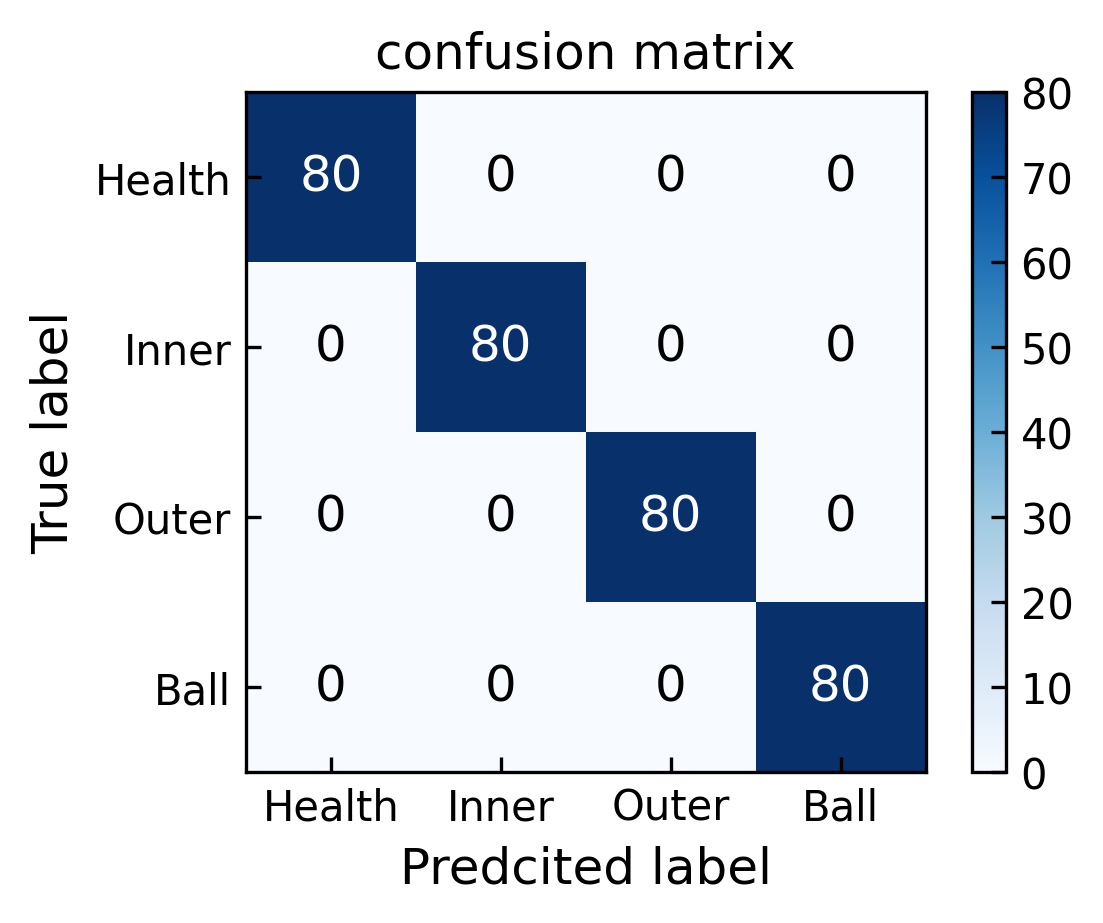

In [9]:
y_true = test_label
y_pre = y_pred

class_name = ["Health", "Inner", "Outer", "Ball"]
plot_confusion_matrix(y_true, y_pre, class_name)